## Read a CSV file

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
#read a csv file
df=pd.read_csv('/Users/saaijeeshsn/Library/CloudStorage/OneDrive-UCB-O365/ML/cleaned_data1.csv')
df.head()

,date,month,customer_code,product_code,division,segment,category,product,variant,customer,market,platform,channel,sub_zone,region,quantity,manufacturing_cost,freight_cost,net_sales_amount,holiday_count
0,2018-09-01,September,90023030,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Canada,E-Commerce,Retailer,NaN,NaN,16,85.4272,4.0503,163.98,0
1,2018-09-01,September,90010046,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Bangladesh,E-Commerce,Retailer,ROA,APAC,3,16.0176,0.7408,24.53,0
2,2018-09-01,September,90023023,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Canada,E-Commerce,Retailer,NaN,NaN,31,165.5152,7.6096,308.08,0
3,2018-09-01,September,90012041,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Germany,E-Commerce,Retailer,NE,EU,18,96.1056,4.5517,155.88,0
4,2018-09-01,September,90014141,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Netherlands,E-Commerce,Retailer,NE,EU,2,10.6784,0.5055,18.12,0


In [2]:
#group the data
filter_df = df.groupby(['date', 'division', 'segment', 'category', 'product', 'variant', 'customer', 'market', 'platform', 'channel', 'sub_zone', 'region']).agg({
    'quantity': 'sum',
    'manufacturing_cost': 'sum',
    'freight_cost': 'sum',
    'net_sales_amount': 'sum',
    'holiday_count': 'sum'
}).reset_index()
filter_df.head()

,date,division,segment,category,product,variant,customer,market,platform,channel,sub_zone,region,quantity,manufacturing_cost,freight_cost,net_sales_amount,holiday_count
0,2018-09-01,N & S,Networking,Wi fi extender,AQ Wi Power Dx1,Plus,Acclaimed Stores,Indonesia,Brick & Mortar,Retailer,ROA,APAC,351,2535.7995,100.6501,4211.30,0
1,2018-09-01,N & S,Networking,Wi fi extender,AQ Wi Power Dx1,Plus,Amazon,Bangladesh,E-Commerce,Retailer,ROA,APAC,22,158.9390,5.7150,189.24,0
2,2018-09-01,N & S,Networking,Wi fi extender,AQ Wi Power Dx1,Plus,Amazon,Germany,E-Commerce,Retailer,NE,EU,37,267.3065,11.7609,402.77,0
3,2018-09-01,N & S,Networking,Wi fi extender,AQ Wi Power Dx1,Plus,Amazon,Netherlands,E-Commerce,Retailer,NE,EU,9,65.0205,2.9077,104.22,0
4,2018-09-01,N & S,Networking,Wi fi extender,AQ Wi Power Dx1,Plus,Amazon,Pakistan,E-Commerce,Retailer,ROA,APAC,15,108.3675,4.6046,183.45,0


In [3]:
#filter the numerical columns
num_cols=filter_df[['quantity','manufacturing_cost','freight_cost','net_sales_amount','holiday_count']]
num_cols.head()

,quantity,manufacturing_cost,freight_cost,net_sales_amount,holiday_count
0,351,2535.7995,100.6501,4211.30,0
1,22,158.9390,5.7150,189.24,0
2,37,267.3065,11.7609,402.77,0
3,9,65.0205,2.9077,104.22,0
4,15,108.3675,4.6046,183.45,0


In [4]:
#check its correlation
num_cols.corr()

,quantity,manufacturing_cost,freight_cost,net_sales_amount,holiday_count
quantity,1.000000,0.654177,0.641185,0.652360,0.068288
manufacturing_cost,0.654177,1.000000,0.982779,0.992138,0.083606
freight_cost,0.641185,0.982779,1.000000,0.988872,0.090737
net_sales_amount,0.652360,0.992138,0.988872,1.000000,0.079755
holiday_count,0.068288,0.083606,0.090737,0.079755,1.000000


We will be considering quantity, manufacturing cost, freight cost and net sales amount for reducing it to 2 principal components.

In [5]:
# Define a function to categorize the net sales amount
def categorize_sales(net_sales_amount):
    if net_sales_amount <= 1000:
        return "Low sales"
    elif 1000 < net_sales_amount <= 40000:
        return "Medium sales"
    else:
        return "High sales"

# Apply the categorization function to create a new column 'sales_range'
num_cols['sales_range'] = num_cols['net_sales_amount'].apply(categorize_sales)

pca_filter_data=num_cols
pca_filter_data.head()

,quantity,manufacturing_cost,freight_cost,net_sales_amount,holiday_count,sales_range
0,351,2535.7995,100.6501,4211.30,0,Medium sales
1,22,158.9390,5.7150,189.24,0,Low sales
2,37,267.3065,11.7609,402.77,0,Low sales
3,9,65.0205,2.9077,104.22,0,Low sales
4,15,108.3675,4.6046,183.45,0,Low sales


In [6]:
# Combine dataframes by row index
new_df = pd.concat([filter_df, num_cols['sales_range']], axis=1)

# Print the first few rows of the combined dataframe
new_df.head()

,date,division,segment,category,product,variant,customer,market,platform,channel,sub_zone,region,quantity,manufacturing_cost,freight_cost,net_sales_amount,holiday_count,sales_range
0,2018-09-01,N & S,Networking,Wi fi extender,AQ Wi Power Dx1,Plus,Acclaimed Stores,Indonesia,Brick & Mortar,Retailer,ROA,APAC,351,2535.7995,100.6501,4211.30,0,Medium sales
1,2018-09-01,N & S,Networking,Wi fi extender,AQ Wi Power Dx1,Plus,Amazon,Bangladesh,E-Commerce,Retailer,ROA,APAC,22,158.9390,5.7150,189.24,0,Low sales
2,2018-09-01,N & S,Networking,Wi fi extender,AQ Wi Power Dx1,Plus,Amazon,Germany,E-Commerce,Retailer,NE,EU,37,267.3065,11.7609,402.77,0,Low sales
3,2018-09-01,N & S,Networking,Wi fi extender,AQ Wi Power Dx1,Plus,Amazon,Netherlands,E-Commerce,Retailer,NE,EU,9,65.0205,2.9077,104.22,0,Low sales
4,2018-09-01,N & S,Networking,Wi fi extender,AQ Wi Power Dx1,Plus,Amazon,Pakistan,E-Commerce,Retailer,ROA,APAC,15,108.3675,4.6046,183.45,0,Low sales


## Select the required features for PCA

In [7]:
#filter the data required for PCA
pca_filtered_data=pca_filter_data[['quantity','manufacturing_cost','freight_cost','net_sales_amount']]
pca_filtered_data.head()

,quantity,manufacturing_cost,freight_cost,net_sales_amount
0,351,2535.7995,100.6501,4211.30
1,22,158.9390,5.7150,189.24
2,37,267.3065,11.7609,402.77
3,9,65.0205,2.9077,104.22
4,15,108.3675,4.6046,183.45


In [8]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the data
scaled_data = scaler.fit_transform(pca_filtered_data)

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=pca_filtered_data.columns)

# Display the scaled DataFrame
scaled_df.head()


,quantity,manufacturing_cost,freight_cost,net_sales_amount
0,1.372408,1.498847,1.077713,1.540348
1,-0.288543,-0.360635,-0.395830,-0.408709
2,-0.212816,-0.275856,-0.301988,-0.305234
3,-0.354174,-0.434110,-0.439403,-0.449909
4,-0.323883,-0.400198,-0.413065,-0.411514


In [9]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df)

# Create a DataFrame to store the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

pca_df.head()

,PC1,PC2
0,2.732030,0.275956
1,-0.731838,0.014818
2,-0.552228,0.016593
3,-0.842146,-0.007587
4,-0.777753,-0.003359


In [10]:
# Combine dataframes by row index
concatenated_data = pd.concat([pca_df, pca_filter_data["sales_range"]], axis=1)

# Print the first few rows of the combined dataframe
concatenated_data.head()



,PC1,PC2,sales_range
0,2.732030,0.275956,Medium sales
1,-0.731838,0.014818,Low sales
2,-0.552228,0.016593,Low sales
3,-0.842146,-0.007587,Low sales
4,-0.777753,-0.003359,Low sales


In [11]:
# Get the loading scores
loading_scores = pca.components_.T

# Create a DataFrame to store the loading scores
loading_scores_df = pd.DataFrame(loading_scores, columns=['PC1', 'PC2'], index=scaled_df.columns)

# Display the loading scores
loading_scores_df.head()

,PC1,PC2
quantity,0.412309,0.910899
manufacturing_cost,0.526436,-0.228048
freight_cost,0.524395,-0.251398
net_sales_amount,0.527140,-0.234640


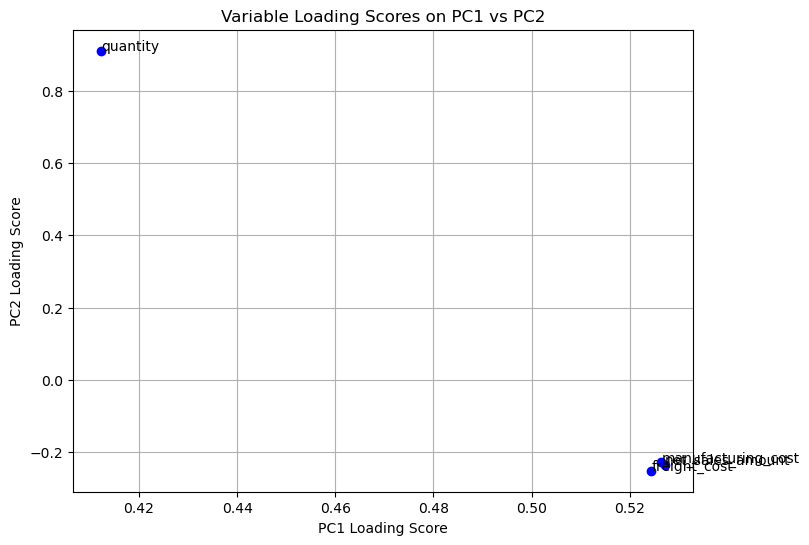

In [23]:
import matplotlib.pyplot as plt

# Retrieve PC1 and PC2 loading scores
pc1_loadings = loading_scores_df['PC1']
pc2_loadings = loading_scores_df['PC2']

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(pc1_loadings, pc2_loadings, marker='o', color='blue')

# Label each data point with the variable name
for variable, (pc1, pc2) in loading_scores_df.iterrows():
    plt.annotate(variable, (pc1, pc2))

# Add labels and title
plt.xlabel('PC1 Loading Score')
plt.ylabel('PC2 Loading Score')
plt.title('Variable Loading Scores on PC1 vs PC2')

# Show plot
plt.grid(True)
plt.show()



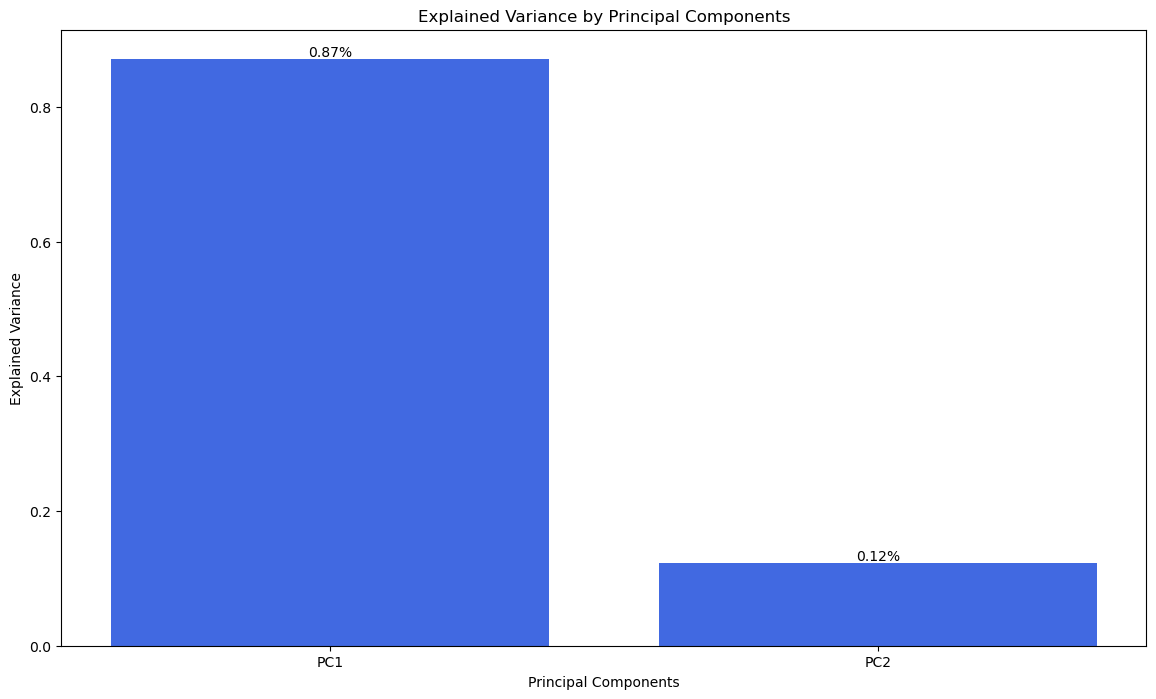

In [24]:
import matplotlib.pyplot as plt
# Extract explained variance
explained_variance = pca.explained_variance_ratio_

# Convert explained variance to percentage
explained_variance_percentage = explained_variance * 100

# Create a DataFrame for plotting
df_explained_variance = pd.DataFrame({
    'PC': ['PC1', 'PC2'],
    'Explained_Variance': explained_variance,
    'Explained_Variance(%)': explained_variance_percentage
})

# Plot scree plot
plt.figure(figsize=(14, 8))
plt.bar(df_explained_variance['PC'], df_explained_variance['Explained_Variance'], color='royalblue')

# Add percentage labels to the bars
for i, value in enumerate(df_explained_variance['Explained_Variance']):
    plt.text(i, value, f'{value:.2f}%', ha='center', va='bottom')

plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.show()


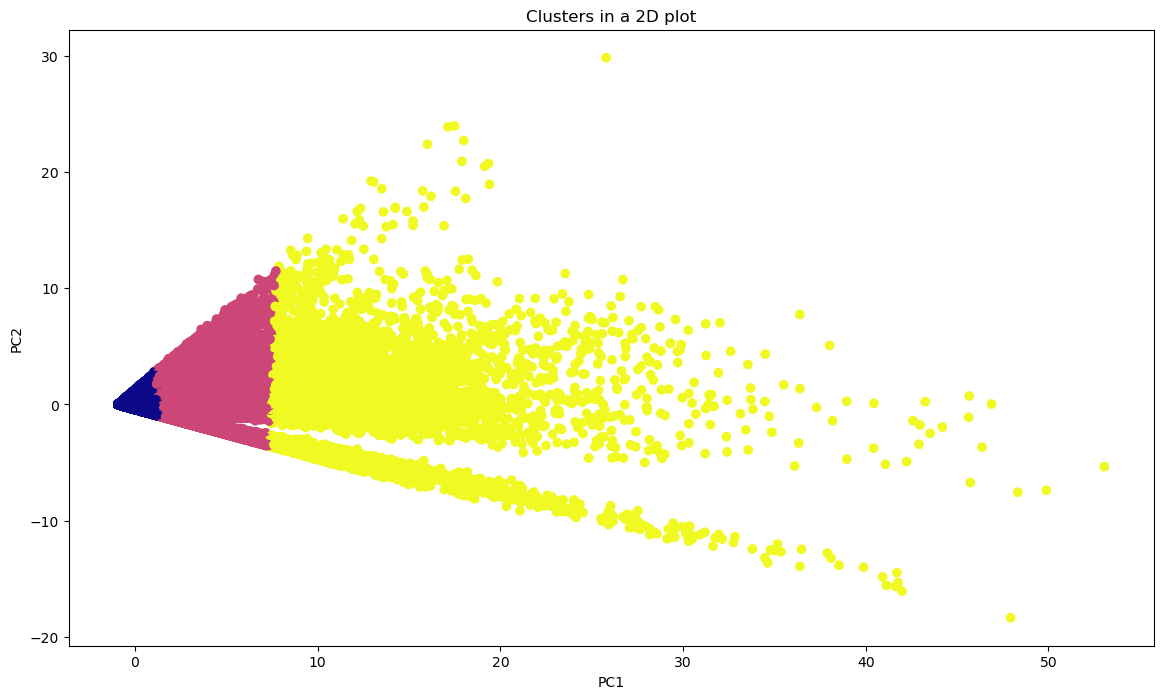

In [28]:
from sklearn.cluster import KMeans

# Apply kmeans clustering on pca_df data
kmeans_pca = KMeans(n_clusters=3, n_init=10)
kmeans_pca.fit(pca_df)
cluster_labels_pca = kmeans_pca.labels_

# Create a scatter plot
plt.figure(figsize=(14, 8))
plt.scatter(pca_df.iloc[:, 0], pca_df.iloc[:, 1], c=cluster_labels_pca, cmap='plasma')
plt.title('Clusters in a 2D plot')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [130]:
# Combine dataframes by row index
concatenated_data_4 = pd.concat([new_df, pca_df[['PC1','PC2']]], axis=1)

# Print the first few rows of the combined dataframe
concatenated_data_4.head()

,date,division,segment,category,product,variant,customer,market,platform,channel,sub_zone,region,quantity,manufacturing_cost,freight_cost,net_sales_amount,holiday_count,sales_range,PC1,PC2
0,2018-09-01,N & S,Networking,Wi fi extender,AQ Wi Power Dx1,Plus,Acclaimed Stores,Indonesia,Brick & Mortar,Retailer,ROA,APAC,351,2535.7995,100.6501,4211.30,0,Medium sales,2.732030,0.275956
1,2018-09-01,N & S,Networking,Wi fi extender,AQ Wi Power Dx1,Plus,Amazon,Bangladesh,E-Commerce,Retailer,ROA,APAC,22,158.9390,5.7150,189.24,0,Low sales,-0.731838,0.014818
2,2018-09-01,N & S,Networking,Wi fi extender,AQ Wi Power Dx1,Plus,Amazon,Germany,E-Commerce,Retailer,NE,EU,37,267.3065,11.7609,402.77,0,Low sales,-0.552228,0.016593
3,2018-09-01,N & S,Networking,Wi fi extender,AQ Wi Power Dx1,Plus,Amazon,Netherlands,E-Commerce,Retailer,NE,EU,9,65.0205,2.9077,104.22,0,Low sales,-0.842146,-0.007587
4,2018-09-01,N & S,Networking,Wi fi extender,AQ Wi Power Dx1,Plus,Amazon,Pakistan,E-Commerce,Retailer,ROA,APAC,15,108.3675,4.6046,183.45,0,Low sales,-0.777753,-0.003359


In [131]:
#reduced highly correlated variables
reduced_df=concatenated_data_4.drop(columns=['quantity','manufacturing_cost','freight_cost','net_sales_amount'])
reduced_df.head()

,date,division,segment,category,product,variant,customer,market,platform,channel,sub_zone,region,holiday_count,sales_range,PC1,PC2
0,2018-09-01,N & S,Networking,Wi fi extender,AQ Wi Power Dx1,Plus,Acclaimed Stores,Indonesia,Brick & Mortar,Retailer,ROA,APAC,0,Medium sales,2.732030,0.275956
1,2018-09-01,N & S,Networking,Wi fi extender,AQ Wi Power Dx1,Plus,Amazon,Bangladesh,E-Commerce,Retailer,ROA,APAC,0,Low sales,-0.731838,0.014818
2,2018-09-01,N & S,Networking,Wi fi extender,AQ Wi Power Dx1,Plus,Amazon,Germany,E-Commerce,Retailer,NE,EU,0,Low sales,-0.552228,0.016593
3,2018-09-01,N & S,Networking,Wi fi extender,AQ Wi Power Dx1,Plus,Amazon,Netherlands,E-Commerce,Retailer,NE,EU,0,Low sales,-0.842146,-0.007587
4,2018-09-01,N & S,Networking,Wi fi extender,AQ Wi Power Dx1,Plus,Amazon,Pakistan,E-Commerce,Retailer,ROA,APAC,0,Low sales,-0.777753,-0.003359


In [132]:
reduced_df.to_csv('/Users/saaijeeshsn/Library/CloudStorage/OneDrive-UCB-O365/ML/reduced_final_df.csv')